In [1]:
import numpy as np
import itertools
import sklearn.metrics  as metrics
from scipy.stats import zscore
from sklearn.preprocessing import normalize
%load_ext autoreload
%autoreload 2
%aimport utils
from LogisticRegressionClassifier import LogisticRegressionClassifier

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
class_dict, class_labels, ffts = utils.read_features(feature='fft')
class_dict

{'blues': 0,
 'classical': 8,
 'country': 2,
 'disco': 9,
 'hiphop': 3,
 'jazz': 5,
 'metal': 6,
 'pop': 1,
 'reggae': 4,
 'rock': 7}

In [4]:
lrc = LogisticRegressionClassifier(ffts, class_labels, class_dict)

In [15]:
lrc.train(reset=True)

initializing weight and delta matrix for the first time
Step 0: Error: -1.000000 updating learning rate: 0.000084
Step 9: Error: 14.240899 updating learning rate: 0.000084
Step 10: Error: 14.317167 updating learning rate: 0.000084
Step 11: Error: 15.472016 updating learning rate: 0.000084
Step 12: Error: 16.554639 updating learning rate: 0.000084
Step 13: Error: 17.567968 updating learning rate: 0.000083
Step 14: Error: 18.517833 updating learning rate: 0.000083
Step 15: Error: 19.406692 updating learning rate: 0.000083
Step 16: Error: 20.237069 updating learning rate: 0.000083
Step 17: Error: 21.013855 updating learning rate: 0.000083
Step 18: Error: 21.739171 updating learning rate: 0.000083
Step 19: Error: 22.415186 updating learning rate: 0.000083
Step 20: Error: 23.045997 updating learning rate: 0.000083
Step 21: Error: 23.633431 updating learning rate: 0.000083
Step 22: Error: 24.179358 updating learning rate: 0.000083
Step 23: Error: 24.687197 updating learning rate: 0.000083
St

[autoreload of utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.4/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/Users/carlyhendrickson/git/logistic_regression/src/utils.py", line 65
    def plot_confusion_matrix(cm,
      ^
SyntaxError: invalid syntax
]


In [18]:
lrc.train(reset=False)

Final Step 1000: Error: 3.614193 
 Learn rate: 0.000081


In [19]:
preds, probs = lrc.prediction(lrc.W, ffts)

             precision    recall  f1-score   support

          0       0.41      0.42      0.42        97
          1       0.70      0.64      0.67       110
          2       0.36      0.55      0.44        65
          3       0.27      0.66      0.38        41
          4       0.24      0.55      0.33        44
          5       0.25      0.49      0.33        51
          6       0.75      0.55      0.63       137
          7       0.24      0.75      0.36        32
          8       0.93      0.28      0.43       331
          9       0.38      0.41      0.40        92

avg / total       0.63      0.45      0.47      1000



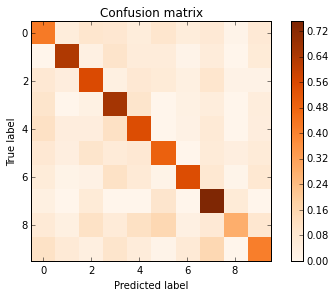

In [20]:
print(metrics.classification_report(preds, class_labels))
cm = utils.plot_confusion_matrix(metrics.confusion_matrix(preds, class_labels))

In [65]:
np.load('/cs/genres/blues/blues.00029.mfc.npy')

array([ 11.65566268,   0.5422652 ,   0.82455446,  -0.01274703,
         0.30493301,   0.28511441,  -0.02377612,   0.35329073,
        -0.17688426,   0.4147061 ,  -0.01374432,   0.12068376,  -0.19252127])

In [97]:
mfc_dict, mfc_labels, mfcs, = utils.read_features(feature='mfc')

In [99]:
lrc_mfc = LogisticRegressionClassifier(mfcs, mfc_labels, mfc_dict)

In [108]:
lrc_mfc.train(reset=False, eta=0.0000001)

Final Step 1000: Error: 7.980285 
 Learn rate: 0.000000


In [106]:
mfc_pred, mfc_probas = lrc_mfc.prediction(lrc_mfc.W, mfcs)

             precision    recall  f1-score   support

          0       0.28      0.67      0.40        49
          1       0.51      0.38      0.44        71
          2       0.45      0.26      0.33        58
          3       0.00      0.00      0.00        28
          4       0.45      0.40      0.43        75
          5       0.00      0.00      0.00        25
          6       0.49      0.86      0.62        63
          7       0.00      0.00      0.00        24

avg / total       0.36      0.40      0.36       393



/usr/local/lib/python3.4/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


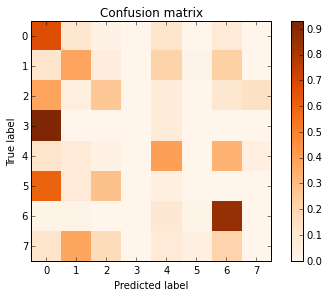

In [109]:
print(metrics.classification_report(mfc_labels, mfc_pred))
cm = utils.plot_confusion_matrix(metrics.confusion_matrix(mfc_labels, mfc_pred))